<a href="https://colab.research.google.com/github/Erhuvwurhire/Predictive-Maintenance-/blob/main/Predictive_Maintenance_RUL_NASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

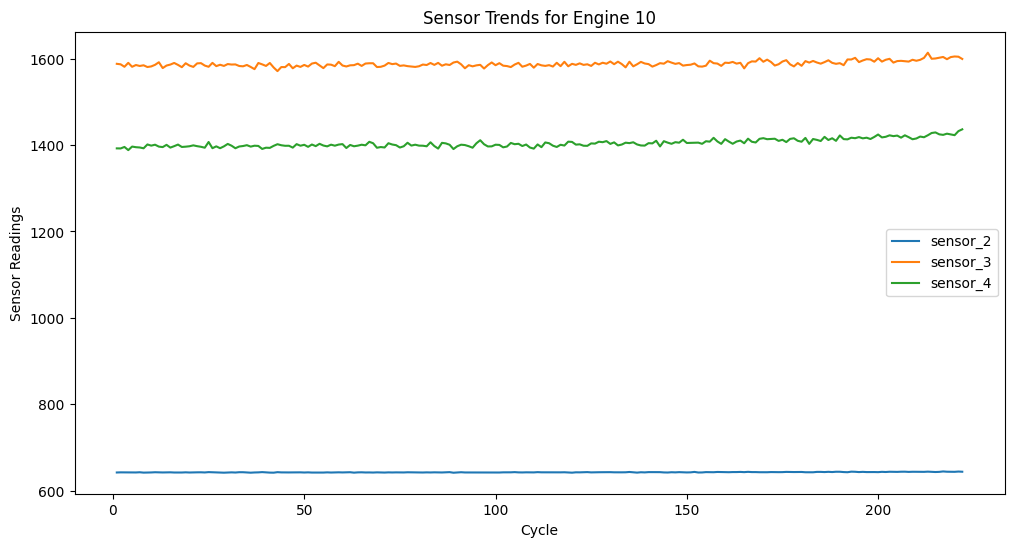

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define column names
cols = ['engine_id', 'cycle'] + \
       ['op_setting_1', 'op_setting_2', 'op_setting_3'] + \
       ['sensor_' + str(i) for i in range(1, 22)]

# Load dataset
df = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=cols)
df.head()

# Compute RUL (Remaining Useful Life)
rul_df = df.groupby('engine_id')['cycle'].max().reset_index()
rul_df.columns = ['engine_id', 'max_cycle']
df = df.merge(rul_df, on='engine_id')
df['RUL'] = df['max_cycle'] - df['cycle']
df.drop('max_cycle', axis=1, inplace=True)

# Preview
df[['engine_id', 'cycle', 'RUL']].head()

# Plot sensor values for a sample engine
engine_id = 10
sensor_cols = ['sensor_2', 'sensor_3', 'sensor_4']

plt.figure(figsize=(12, 6))
for sensor in sensor_cols:
    plt.plot(df[df.engine_id == engine_id]['cycle'],
             df[df.engine_id == engine_id][sensor],
             label=sensor)

plt.xlabel("Cycle")
plt.ylabel("Sensor Readings")
plt.title(f"Sensor Trends for Engine {engine_id}")
plt.legend()
plt.show()
